# Lending Club  Case Study
> As an online lending marketplace, the company's goal is to:
> Identify borrowers who may be more likely to default on loans, in order to minimize financial losses and ensure responsible lending practices. Exploratory data analysis (EDA) can be used to analyze the driving factors behind loan defaults.
> Understand the key indicators of loan defaults. This understanding can be used to develop a more accurate risk assessment model. It is important to note that there is no single factor that can guarantee a loan repayment. However, by using data to identify patterns and trends, the company can make more informed lending decisions.


## Table of Contents
* [Problem Statement](#problem-statement)
* [Approach](#approach)
* [Technologies Used](#technologies-used)
* [Conclusions](#conclusions)

<!-- You can include any other section that is pertinent to your problem -->

## Problem Statement
As an online lending marketplace, company aims to :
- Identify 'risky' loan applicants who are likely to default and cause credit loss. 
- Analyzing the driving factors behind loan defaults using exploratory data analysis (EDA).
- Understanding the key indicators of loan defaults, to minimize financial loss and for better risk assessment.


## Approach and Analysis
- Understanding and Data cleaning
  - Understanding what each columns represents
  - Dropping columns which cannot be used, having null values, no variation etc.
  - imputing missing values, removing duplicates, and correcting inconsistencies.
- Analysing the data
  - Univariate Analysis
  - Bivariate Analysis
  - Multivariate and segmented Analysis
- Conclusion
  - Drawing observations and recommendations based on the data  


##  Recommendation and Conclusions
- The following segments seem to have strong influence on defaults :
  - purpose (small business is more likely to default)
  - grade (lower grades are more likely to default)
  - addr_state (some states are more likely to have high defaults)
  - delinq_2yrs (higher values seem to have more)
  - inq_last_6_months (probability of default increases with number of inq)
  - term (36 month loan has high probability of full payment)
  - pub_rec_bankrupcies/pub_rec (individuals reporting higher values can lead to defaulting)
  - loan_amnt (Higher rates can increases the probability of person defaulting)
  - int_rates(majority of the interest rate is in the range of 5% to 15%  and the Very High interest rates are in more likely to default which is greater than 15%)
- The following segments seem to have Low/No influence on loan defaults :
  - verfication_status
  - emp_length
  - home_ownership
  - installments
  - issue_d
  - total_acc
  - total_rec
  - dti
  - home_ownership


<!-- You don't have to answer all the questions - just the ones relevant to your project. -->


## Technologies Used
- [Python - Version 3.12.3](https://www.python.org/download/releases/3.0/)
- [numpy - Version 1.26.4](https://github.com/numpy)
- [pandas - Version 2.2.2](https://github.com/pandas-dev/pandas)
- [matplotlib - Version 3.9.0](https://github.com/matplotlib)
- [seaborn](https://github.com/seaborn)
- [Jupyter Notebook - Version 7.2.0]()

<!-- As the libraries versions keep on changing, it is recommended to mention the version of library used in this project -->


## Team
- Mayuri Kumar

## Contact
Created by [@mayuriku] - feel free to contact me


<!-- Optional -->
<!-- ## License -->
<!-- This project is open source and available under the [... License](). -->

<!-- You don't have to include all sections - just the one's relevant to your project -->

### Imports and Initial Setup

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load data from CSV

In [33]:
#reading the csv file and printing its shape
df = pd.read_csv('loan.csv',low_memory=False)
df.shape

(39717, 111)

### Data Cleaning and Manipulation

In [35]:
# col names where lot of null values
df.isnull().sum()[df.isnull().sum() > 39000]

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [37]:
# dropping the columms where lot of values are null 
s = df.isnull().sum()[df.isnull().sum() > 39000]
for i,x in s.items():
    print('dropped :',i)
    df.drop(i,axis='columns', inplace=True)


dropped : mths_since_last_major_derog
dropped : annual_inc_joint
dropped : dti_joint
dropped : verification_status_joint
dropped : tot_coll_amt
dropped : tot_cur_bal
dropped : open_acc_6m
dropped : open_il_6m
dropped : open_il_12m
dropped : open_il_24m
dropped : mths_since_rcnt_il
dropped : total_bal_il
dropped : il_util
dropped : open_rv_12m
dropped : open_rv_24m
dropped : max_bal_bc
dropped : all_util
dropped : total_rev_hi_lim
dropped : inq_fi
dropped : total_cu_tl
dropped : inq_last_12m
dropped : acc_open_past_24mths
dropped : avg_cur_bal
dropped : bc_open_to_buy
dropped : bc_util
dropped : mo_sin_old_il_acct
dropped : mo_sin_old_rev_tl_op
dropped : mo_sin_rcnt_rev_tl_op
dropped : mo_sin_rcnt_tl
dropped : mort_acc
dropped : mths_since_recent_bc
dropped : mths_since_recent_bc_dlq
dropped : mths_since_recent_inq
dropped : mths_since_recent_revol_delinq
dropped : num_accts_ever_120_pd
dropped : num_actv_bc_tl
dropped : num_actv_rev_tl
dropped : num_bc_sats
dropped : num_bc_tl
dropped 

In [39]:
df.shape

(39717, 57)

In [41]:
# Dropping rows where loan is still in progress
#df['loan_status'].value_counts()
df = df[df['loan_status'] != 'Current']

In [43]:
df.shape

(38577, 57)

In [45]:
# Figuring out values which could be imputed/rectified in the remaining dataset
df.isnull().sum()[df.isnull().sum()>0]

emp_title                      2386
emp_length                     1033
desc                          12529
title                            11
mths_since_last_delinq        24905
mths_since_last_record        35837
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [47]:
# Analysing each table using value_counts i found: 
# these can be used after modification - emp_length, revol_util, last_credit_pull_d, pub_rec_bankruptcies

# cannot be used 
# emp_title dropping as it has a lot of uniqe values
# desc dropping this has no standard format and 12k values missing
# title dropping as it has same data as 'purpose'
# mths_since_last_delinq dropped too large values missing
# mths_since_last_record dropped too large values missing
# next_pymnt_d dropped due to very large values missing
# last_pymnt_d dropped too large values missing
# collections_12_mths_ex_med all values are 0
# chargeoff_within_12_mths all values are 0
# tax_liens all values are 0

# Execute command for each like :
df.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [49]:
#dropping multiple columns
df.drop(['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis='columns',inplace=True)
df.drop(['last_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis='columns',inplace=True)

In [51]:
df.shape
df.isnull().sum()[df.isnull().sum()>0]

emp_length              1033
revol_util                50
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [53]:
# imputing the most common value in last_credit_pull_d which is 'May-16'
df.last_credit_pull_d.value_counts()
df.last_credit_pull_d.fillna('May-16',inplace=True)

In [55]:
# imputing the most common value in revol_util which is '0%'
df.revol_util.value_counts()
df.revol_util.fillna('0%',inplace=True)

In [57]:
df.pub_rec_bankruptcies.value_counts()
df.pub_rec_bankruptcies.fillna(0.0,inplace=True)

Transforming the emp_lenth

In [60]:
#dividing into percentage 
emp_len_series = round(df.emp_length.value_counts()/df.emp_length.value_counts().sum()*100)

In [62]:
random_emp_length =[]
for key,value in emp_len_series.items():
    print(key,value)
    random_emp_length.append(key)

10+ years 23.0
< 1 year 12.0
2 years 11.0
3 years 11.0
4 years 9.0
5 years 9.0
1 year 8.0
6 years 6.0
7 years 5.0
8 years 4.0
9 years 3.0


In [64]:
probability = list(df.emp_length.value_counts(normalize=True).values)
df.emp_length = df.emp_length.apply(lambda x: np.random.choice(random_emp_length, 1, replace=False, p=probability)[0] if pd.isna(x) else x)

In [66]:
df.emp_length.value_counts()

emp_length
10+ years    8715
< 1 year     4615
2 years      4409
3 years      4137
4 years      3438
5 years      3289
1 year       3267
6 years      2225
7 years      1759
8 years      1469
9 years      1254
Name: count, dtype: int64

In [68]:
df.shape

(38577, 47)

In [70]:
#drop columns based on analysis of data in remaining 49 columns 

# id	ID number unique - no usage
# member_id	ID number unique - no usage
# pymnt_plan	Drop same value
# url	Drop - url of loan application not useful
# initial_list_status  Drop, same value for all
# out_prncp	drop 38k zero
# out_prncp_inv	drop 38k zero
# total_pymnt	drop too much varition
# total_pymnt_inv	drop too much varition
# total_rec_int	drop too much varition
# policy_code	drop no vairation			
# application_type	drop no vairation			
# acc_now_delinq	drop no vairation			
# delinq_amnt	drop no vairation		
# last_pymnt_amnt dropping as lot of varation 34k not sure if can be derived

In [72]:
df.drop(['id','member_id','pymnt_plan','url','initial_list_status','out_prncp','out_prncp_inv'],axis='columns',inplace=True)

In [74]:
df.drop(['total_pymnt','total_pymnt_inv','total_rec_int','policy_code','application_type','acc_now_delinq','delinq_amnt','last_pymnt_amnt'],axis='columns',inplace=True)

In [76]:
df.shape
# 32 colums remaining for analysis 

(38577, 32)

In [78]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0,13648,83.70%,9,5000.00,0.0,0.00,0.00,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0,1687,9.40%,4,456.46,0.0,117.08,1.11,Sep-13,0.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               38577 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose                  38

In [82]:
cat_col=['addr_state','purpose','loan_status','issue_d','verification_status']
num_col=['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec_bankruptcies','pub_rec','revol_bal','total_acc','total_rec_prncp']
# ext_col=['instant']

In [84]:
df.nunique()

loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     370
installment                15022
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
purpose                       14
zip_code                     822
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util                  1088
total_acc                     82
total_rec_prncp             6841
total_rec_late_fee          1320
recoveries                  4040
collection_recovery_fee     2616
last_credi

loan_amnt


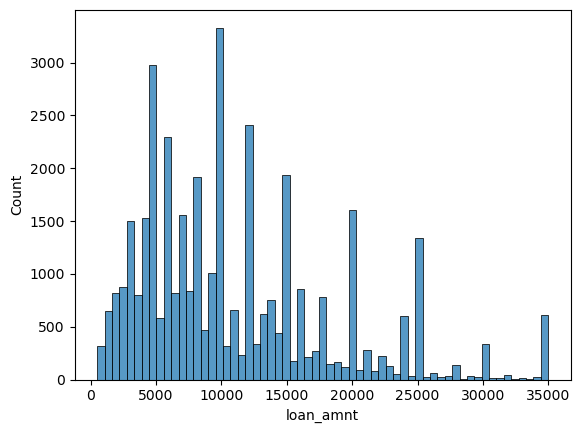

funded_amnt


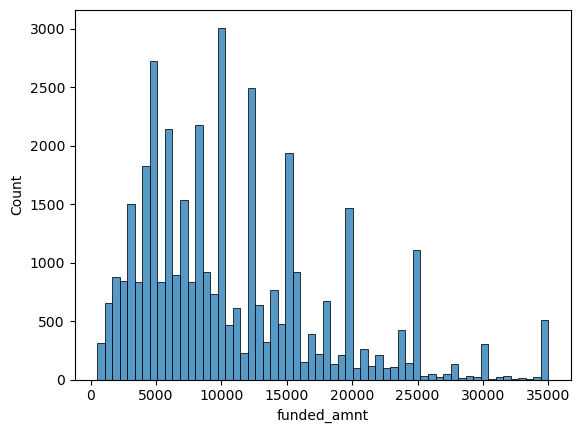

funded_amnt_inv


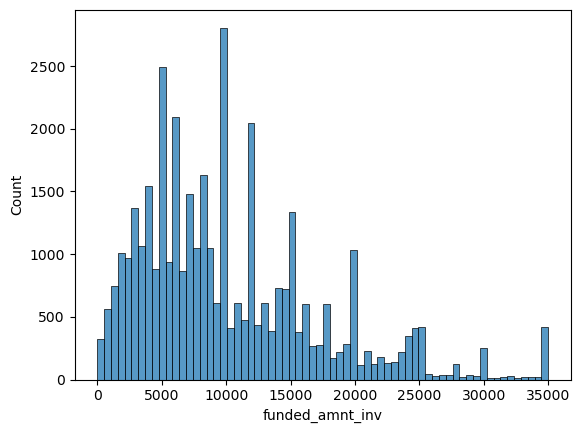

installment


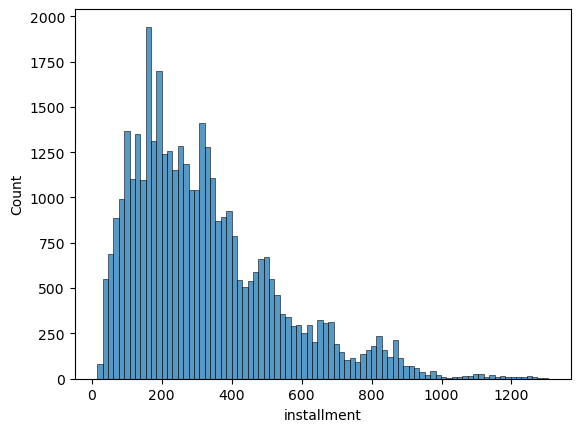

annual_inc


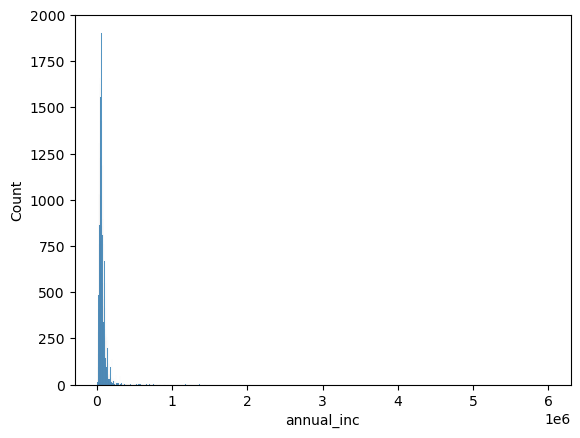

dti


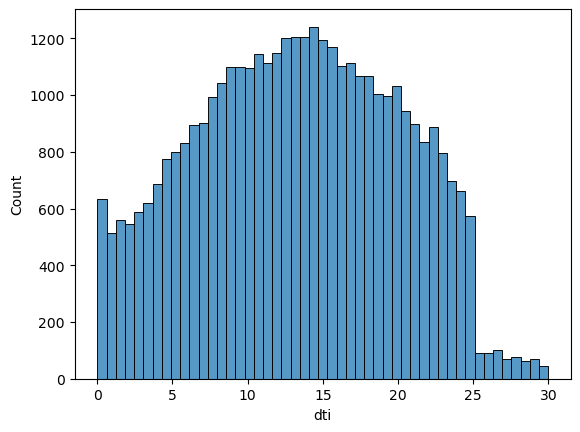

delinq_2yrs


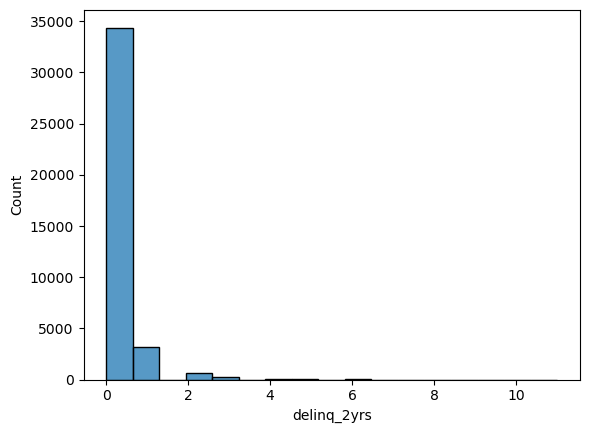

inq_last_6mths


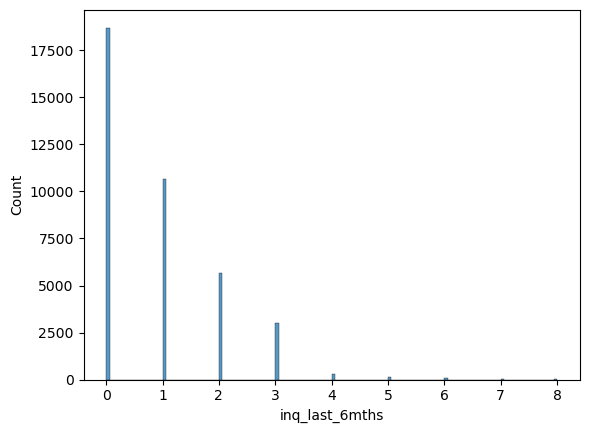

open_acc


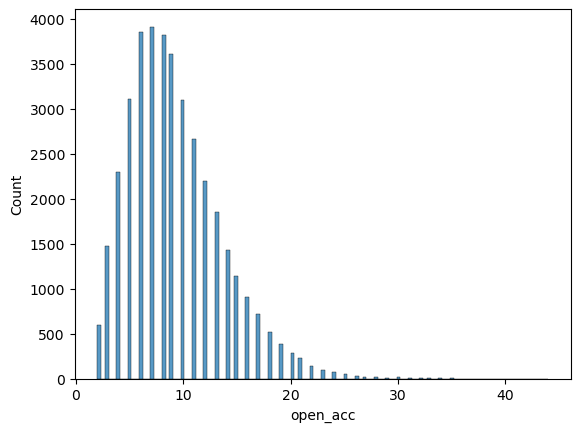

pub_rec_bankruptcies


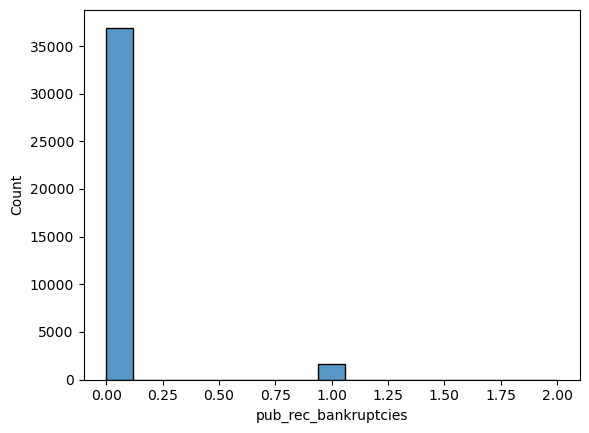

pub_rec


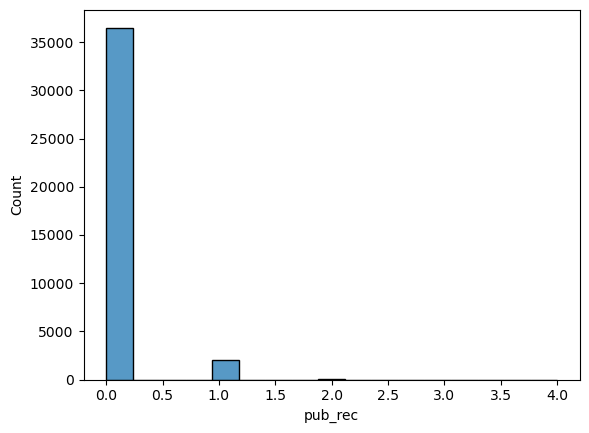

revol_bal


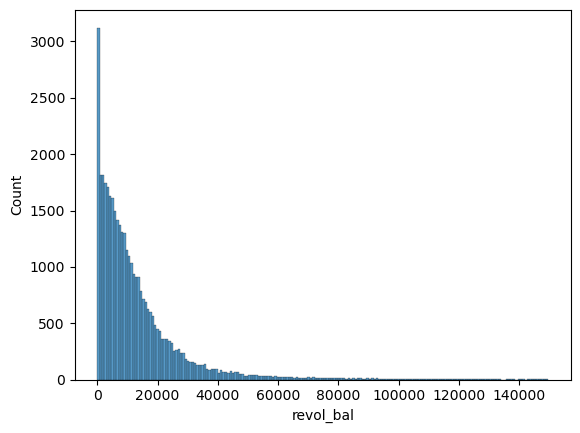

total_acc


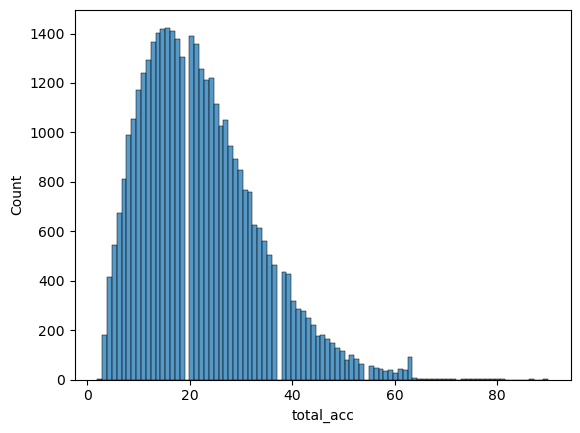

total_rec_prncp


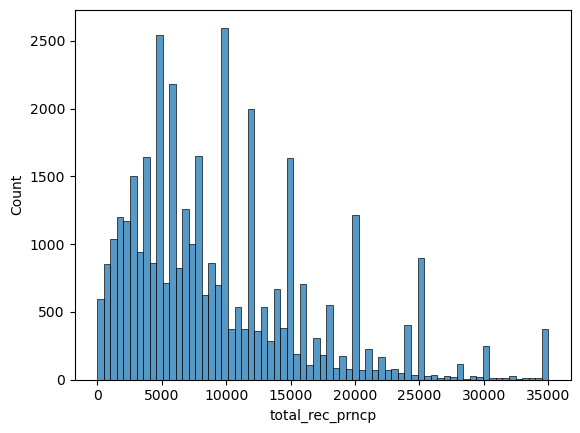

In [86]:
for i in num_col:
    print(i)
    sns.histplot(df[i])
    plt.show()

loan_amnt


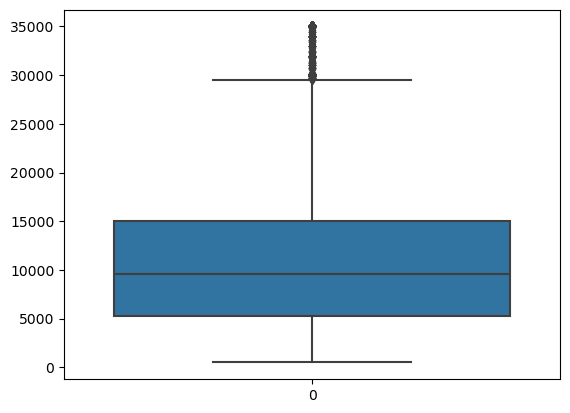

funded_amnt


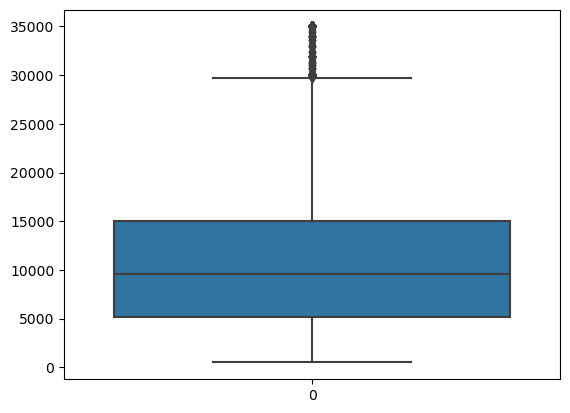

funded_amnt_inv


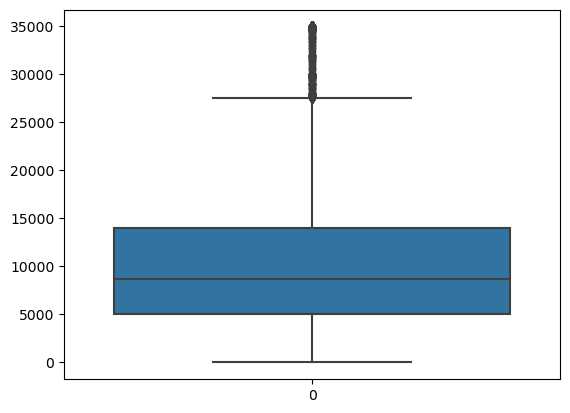

installment


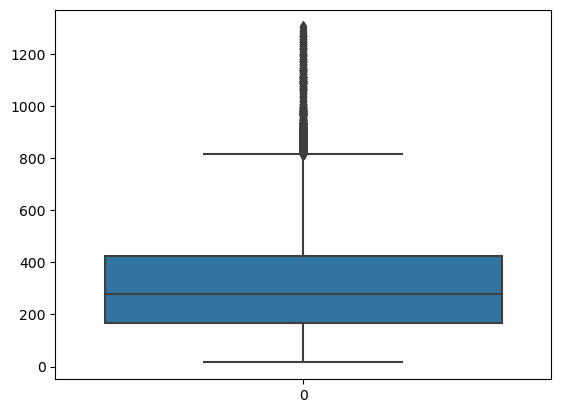

annual_inc


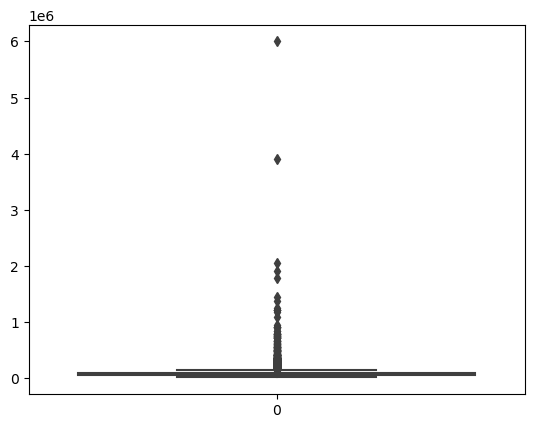

dti


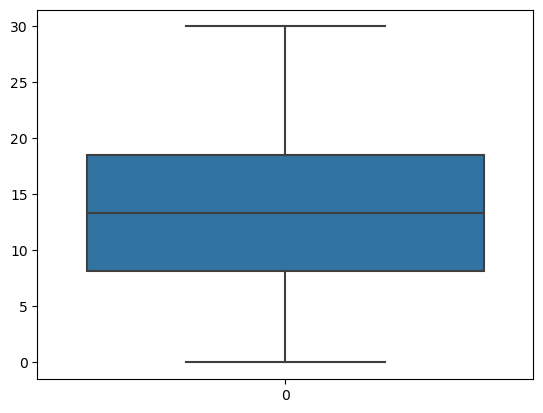

delinq_2yrs


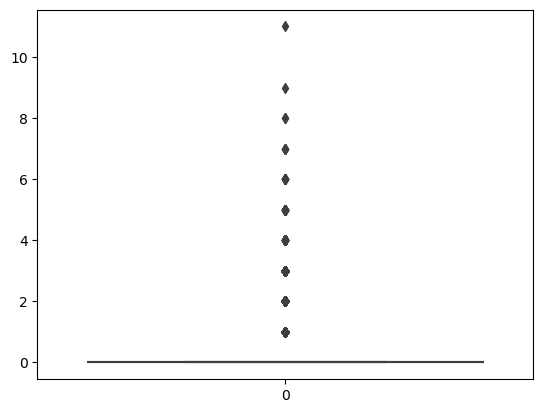

inq_last_6mths


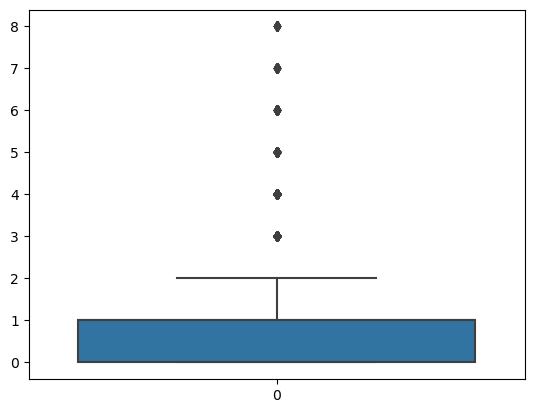

open_acc


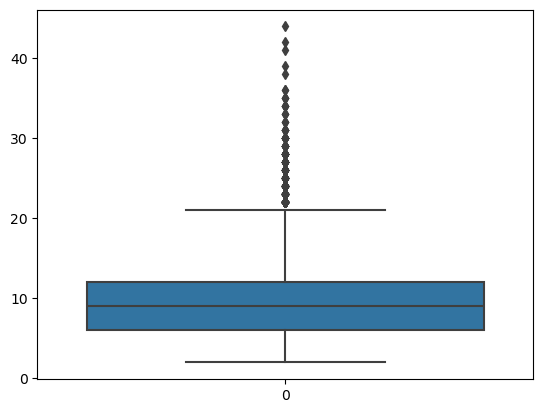

pub_rec_bankruptcies


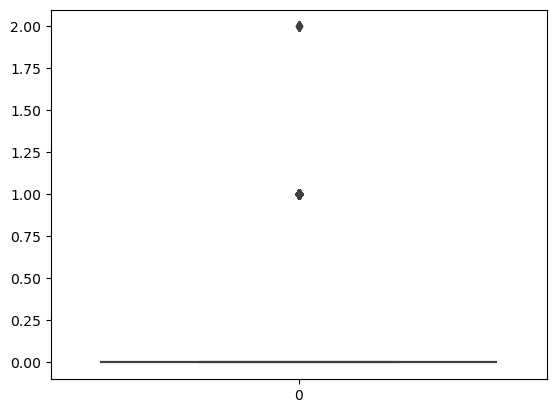

pub_rec


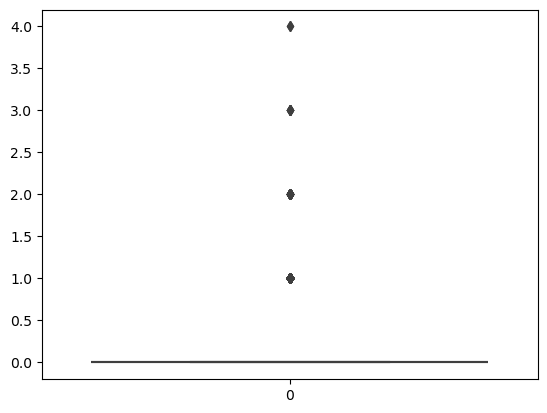

revol_bal


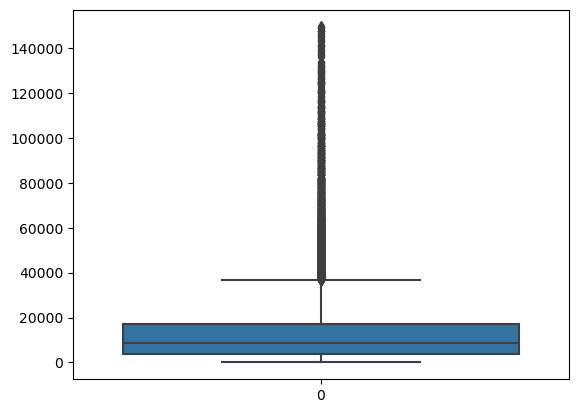

total_acc


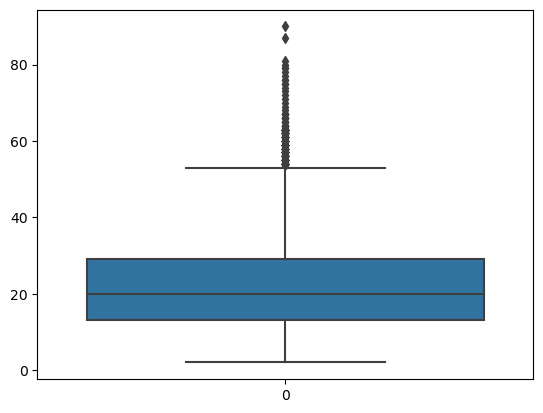

total_rec_prncp


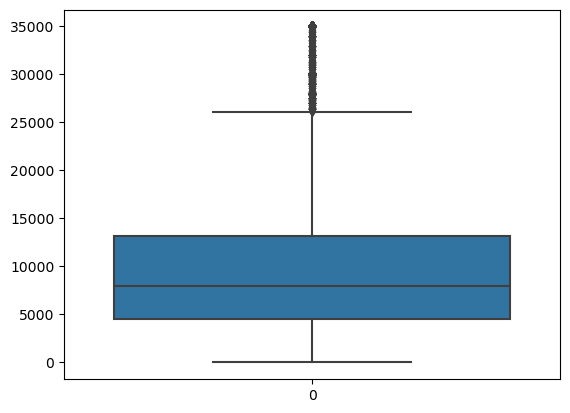

In [88]:
for i in num_col:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [90]:
# num_col.append('int_rate')
# num_col.remove('init_rate')
num_col
# corr = df[num_col].corr()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec_bankruptcies',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'total_rec_prncp']

In [92]:
df['term'] = df['term'].apply(lambda x: int(x.replace('months', '').strip()))

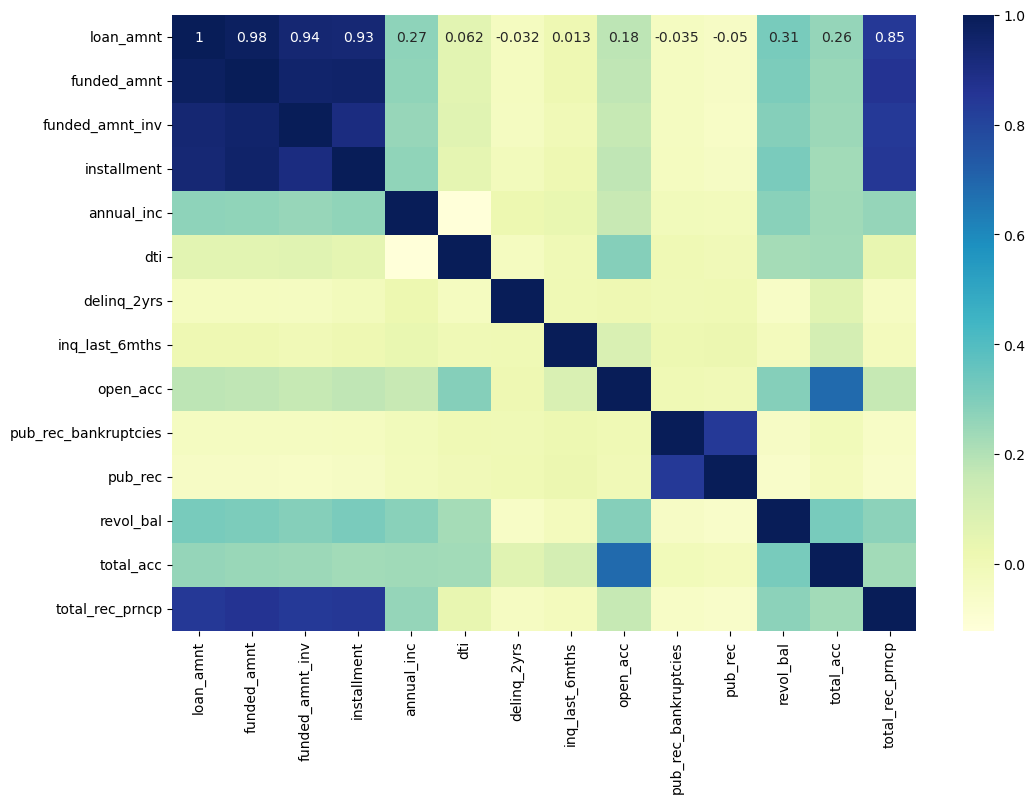

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(),annot=True,cmap="YlGnBu")
plt.show()

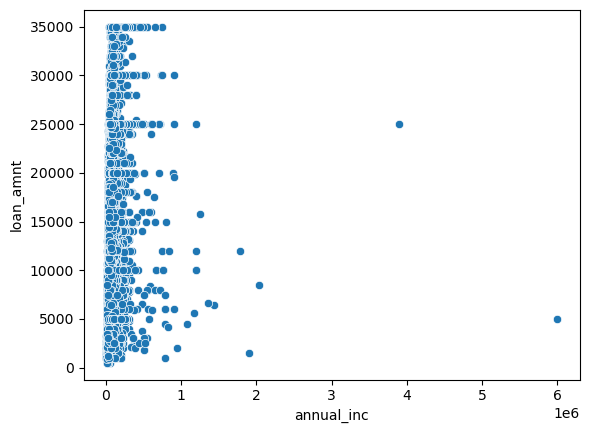

In [96]:
sns.scatterplot(y=df['loan_amnt'],x=df['annual_inc'])
plt.show()

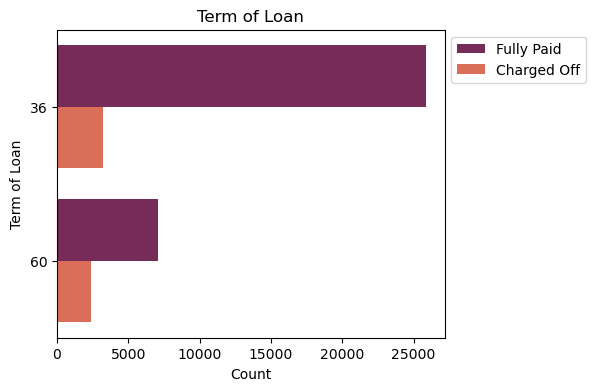

In [98]:
plt.figure(figsize=(5,4))
ax=sns.countplot(y="term",data=df,hue='loan_status',palette='rocket')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Term of Loan')
ax.set_xlabel('Count')
ax.set_ylabel('Term of Loan')
plt.show()

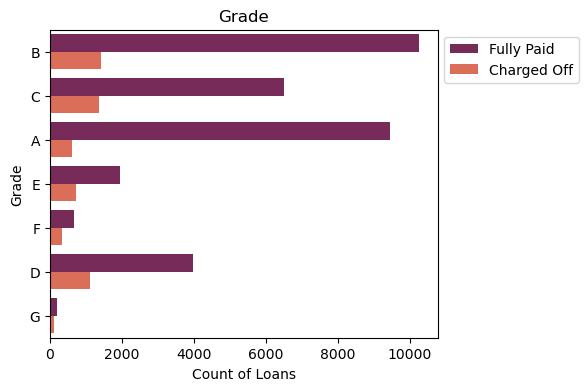

In [100]:
plt.figure(figsize=(5,4))
ax=sns.countplot(y="grade",data=df,hue='loan_status',palette='rocket')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Grade')
ax.set_xlabel('Count of Loans')
ax.set_ylabel('Grade')
plt.show()

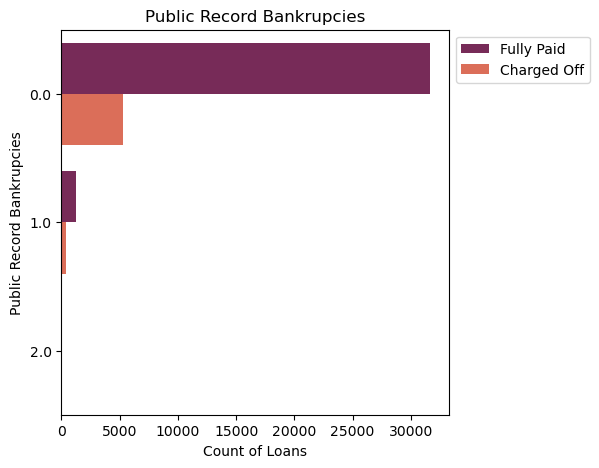

In [102]:
plt.figure(figsize=(5,5))
ax=sns.countplot(y="pub_rec_bankruptcies",data=df,hue='loan_status',palette='rocket')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Public Record Bankrupcies')
ax.set_xlabel('Count of Loans')
ax.set_ylabel('Public Record Bankrupcies')


plt.show()

<Figure size 1000x500 with 0 Axes>

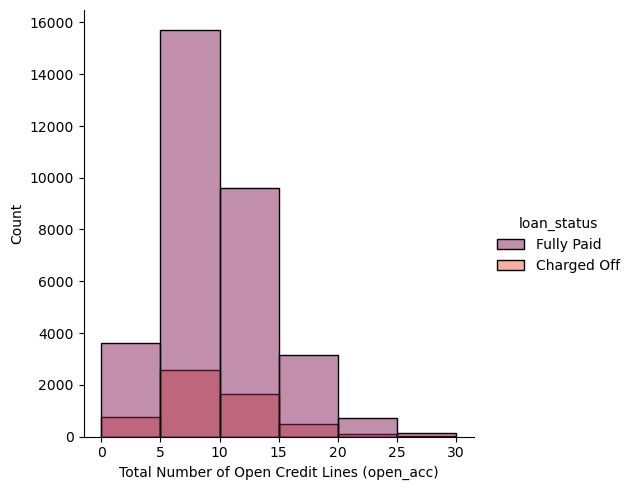

In [104]:
plt.figure(figsize=(10,5))
sns.displot(df, x="open_acc", bins=[0,5,10,15,20,25,30],hue='loan_status',palette='rocket')
plt.xlabel('Total Number of Open Credit Lines (open_acc)', fontsize=10)
plt.show()

<Figure size 1000x500 with 0 Axes>

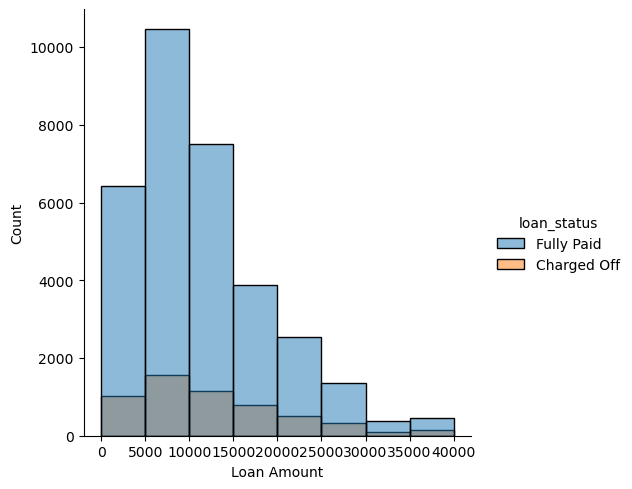

In [106]:
plt.figure(figsize=(10,5))
sns.displot(df, x="loan_amnt", bins=[0,5000,10000,15000,20000,25000,30000,35000,40000],hue='loan_status')
plt.xlabel('Loan Amount', fontsize=10)
plt.show()

In [108]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))

<Figure size 1000x500 with 0 Axes>

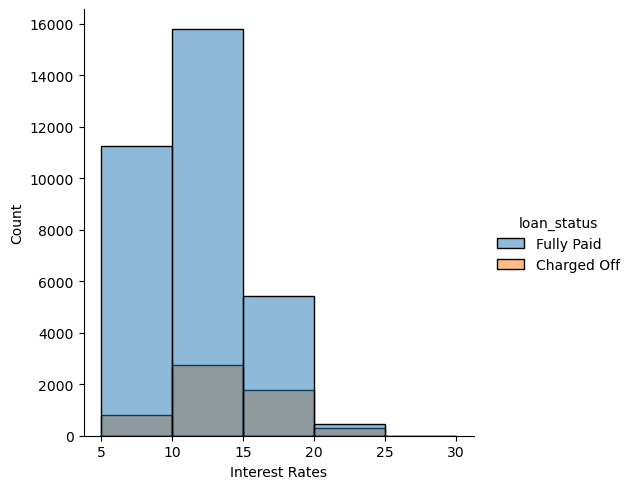

In [110]:
plt.figure(figsize=(10,5))
sns.displot(df, x="int_rate", bins=[5.0,10.0,15.0,20.0,25.0,30.0],hue='loan_status')
plt.xlabel('Interest Rates', fontsize=10)
plt.show()

<Figure size 1000x500 with 0 Axes>

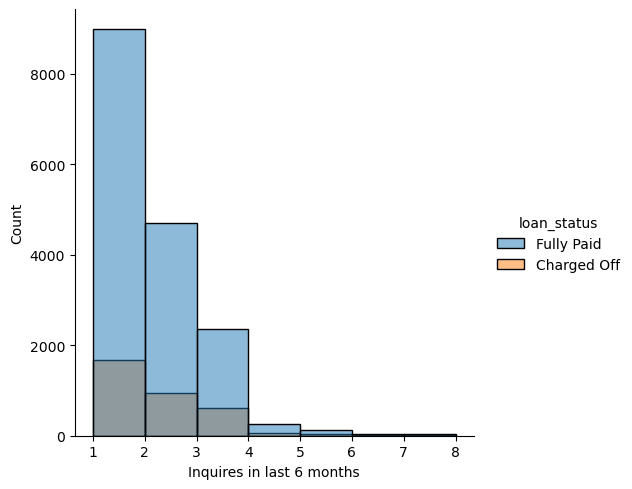

In [112]:
plt.figure(figsize=(10,5))
sns.displot(df, x="inq_last_6mths", bins=[1,2,3,4,5,6,7,8],hue='loan_status')
plt.xlabel('Inquires in last 6 months', fontsize=10)
plt.show()

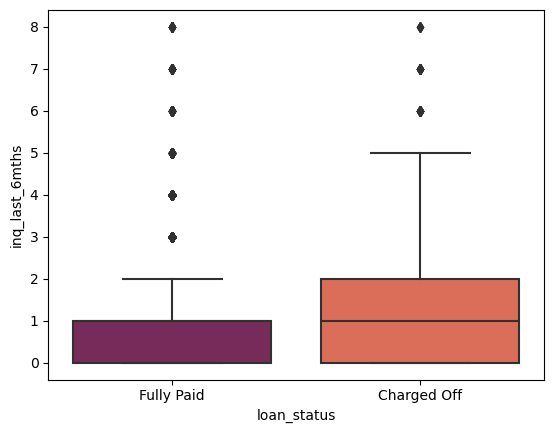

In [114]:
sns.boxplot(y=df['inq_last_6mths'],x=df['loan_status'],palette='rocket')
plt.show()

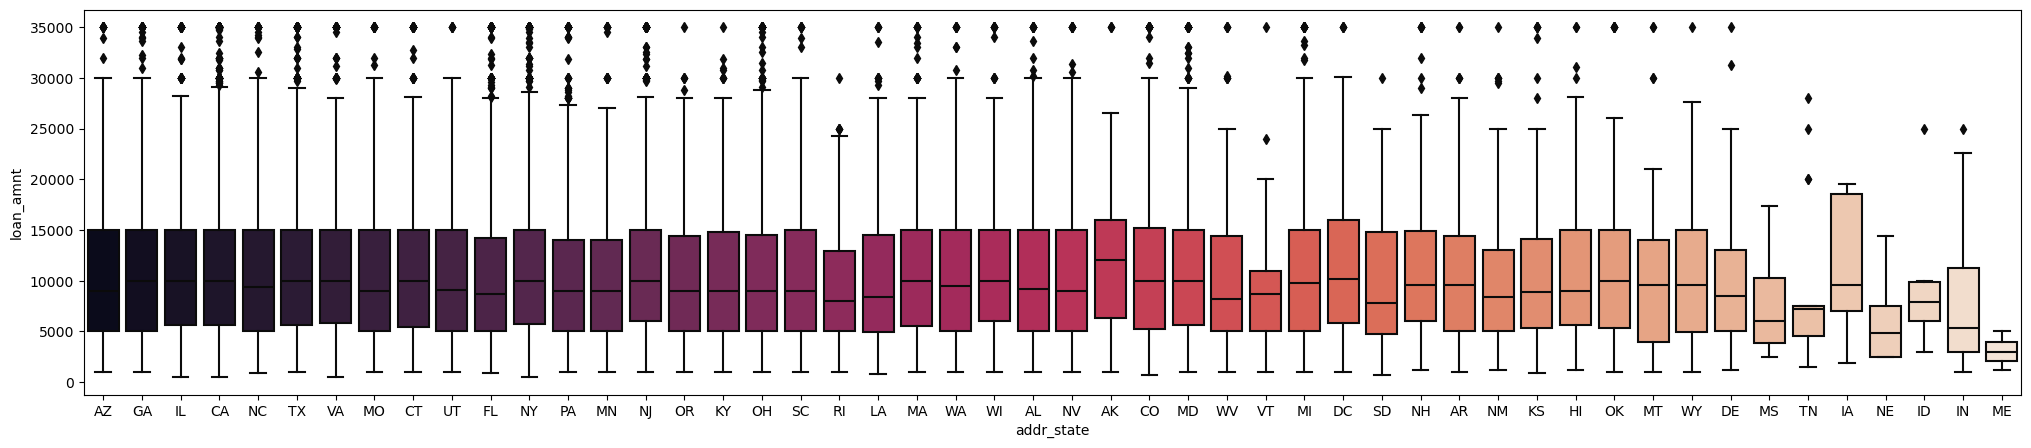

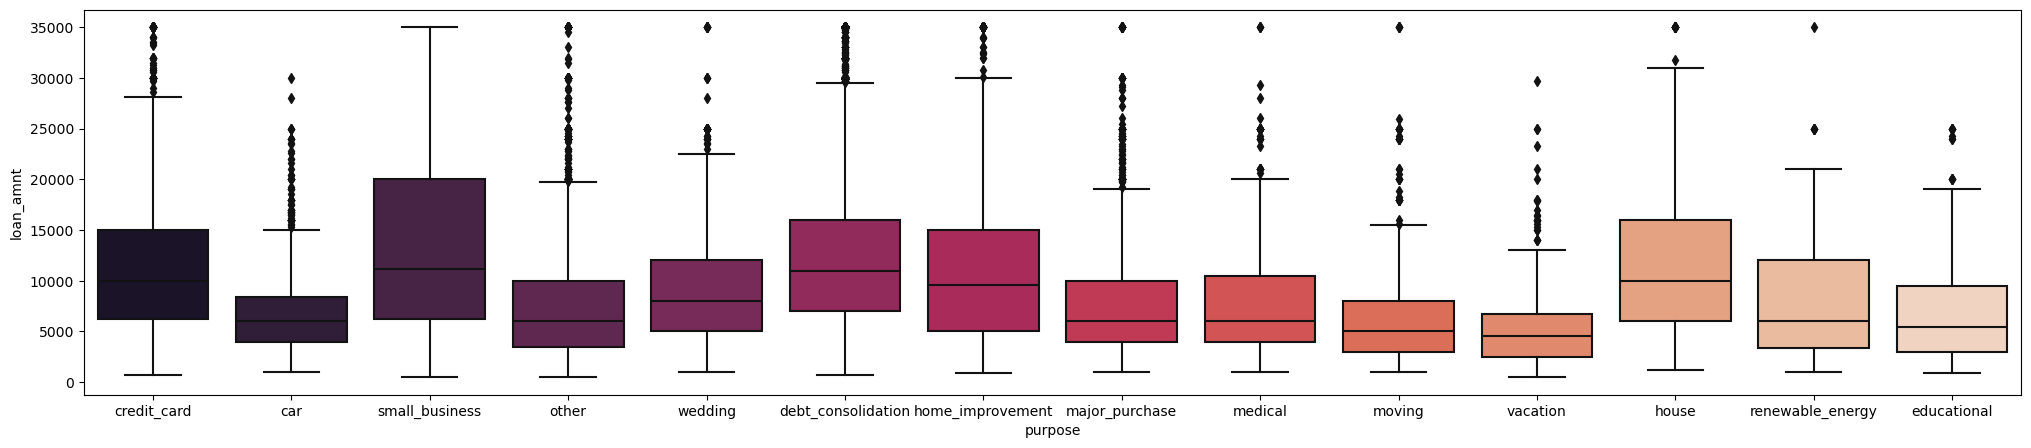

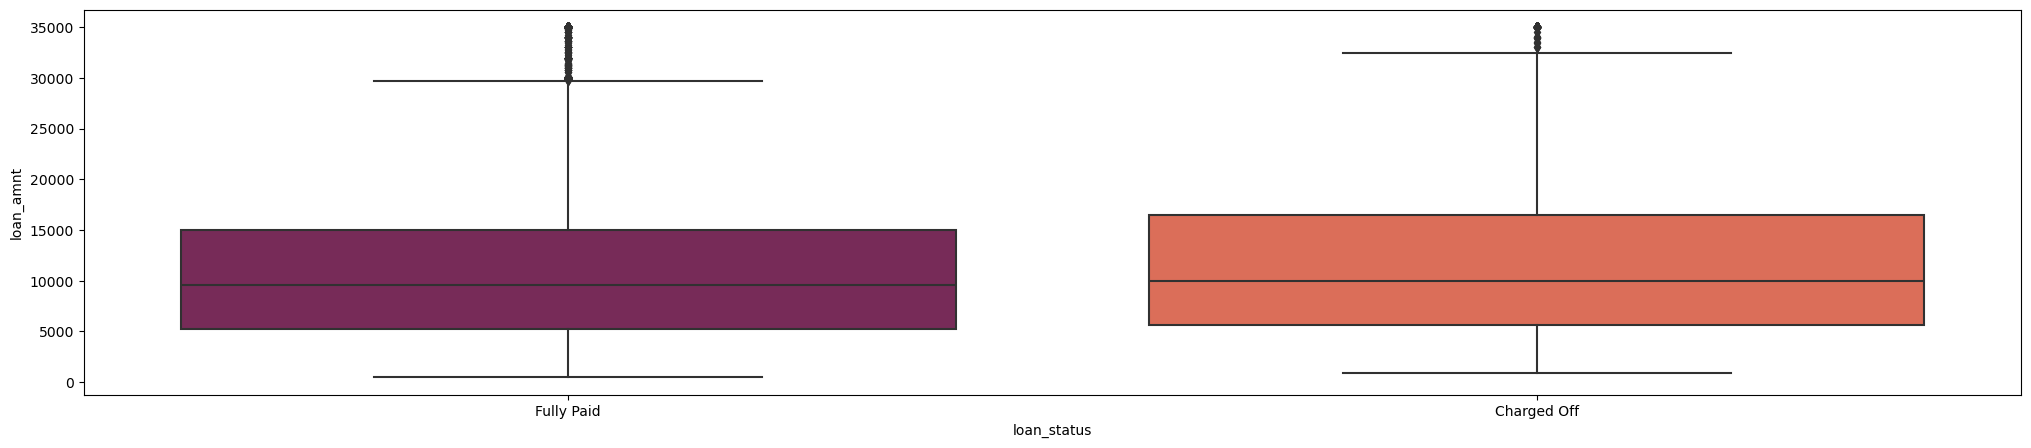

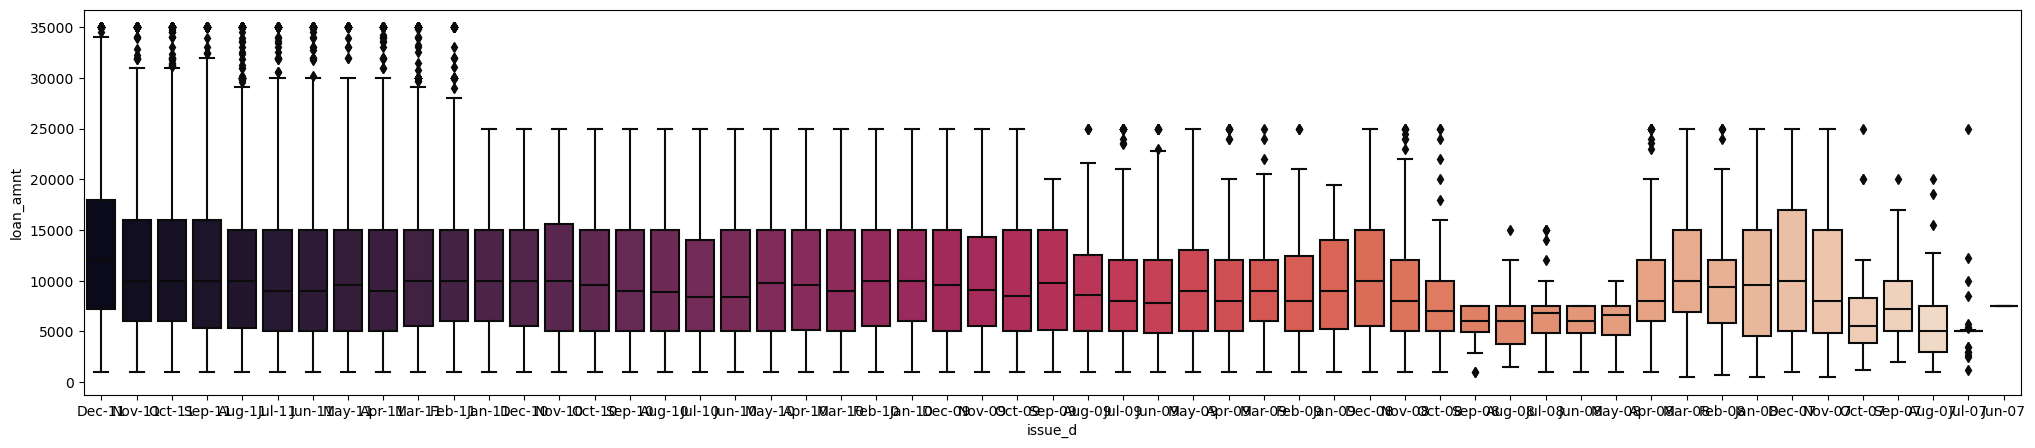

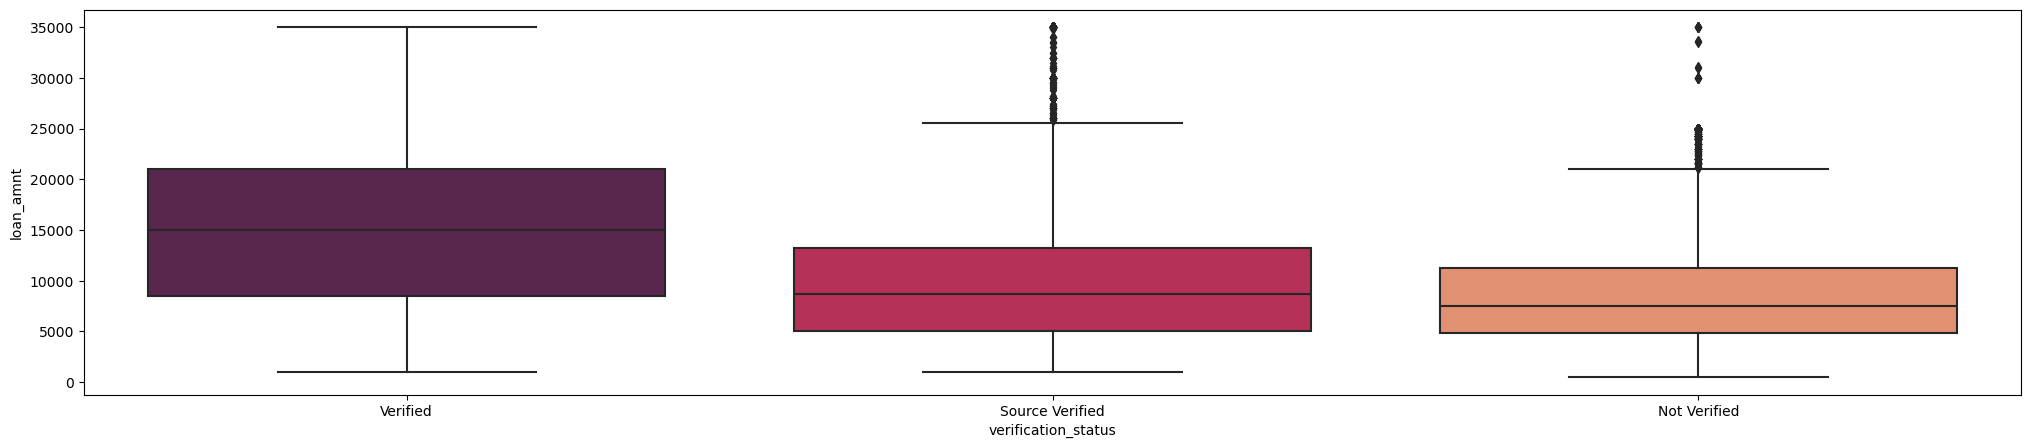

In [116]:
for i in cat_col:
    plt.figure(figsize=(25,5))
    sns.boxplot(x=df[i],y=df['loan_amnt'],palette='rocket')
    plt.show()